<a href="https://colab.research.google.com/github/DentalInformatics/DentalInformatics/blob/main/ReferencesArticles_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mounting the drive for collecting data from csv files 
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls "/content/drive/My Drive/Latest_JSON_Files/"

Article0.json	 Article33.json  Article70.json
Article100.json  Article34.json  Article71.json
Article101.json  Article35.json  Article72.json
Article102.json  Article36.json  Article73.json
Article103.json  Article37.json  Article74.json
Article104.json  Article38.json  Article75.json
Article105.json  Article39.json  Article76.json
Article106.json  Article3.json	 Article77.json
Article107.json  Article40.json  Article78.json
Article108.json  Article41.json  Article79.json
Article109.json  Article42.json  Article7.json
Article10.json	 Article43.json  Article80.json
Article110.json  Article44.json  Article81.json
Article111.json  Article45.json  Article82.json
Article112.json  Article46.json  Article83.json
Article113.json  Article47.json  Article84.json
Article114.json  Article48.json  Article85.json
Article11.json	 Article49.json  Article86.json
Article12.json	 Article4.json	 Article87.json
Article13.json	 Article50.json  Article88.json
Article14.json	 Article51.json  Article89.json
Ar

In [3]:
#collection of reference information and appending the data into a datraframe and csv file.
import json
import pandas
import pandas as pd
from pandas import DataFrame
import re
referencepaperidlist = []
Referencepaperdoilist = []
Referencepapertitlelist = []
Referencepapervenuelist = []
Referencepaperyearlist = []
Isinfluentiallist = [] 
Intentlist = []
article_id = []
for i in range(115):
  f = open('/content/drive/My Drive/Latest_JSON_Files/Article' + str(i) + '.json')
  data = json.load(f)
  article_data = data['doi']
  for value in data['references']:
    article_id.append(article_data)
    referencepaperid = value['paperId']
    referencepaperidlist.append(referencepaperid)
    referencepaperdoi = value['doi']
    Referencepaperdoilist.append(referencepaperdoi)
    Referencepapertitle = value['title']
    Referencepapertitlelist.append(Referencepapertitle)
    Referencepapervenue = value['venue']
    Referencepapervenuelist.append(Referencepapervenue)
    Referencepaperyear = value['year']
    Referencepaperyearlist.append(Referencepaperyear)
    Intent = value['intent']
    Intentlist.append(Intent)
    Isinfluential = value['isInfluential']
    Isinfluentiallist.append(Isinfluential)
a = {'article_id': article_id,'Reference_paper_id' : referencepaperidlist ,'Reference_paper_doi' : Referencepaperdoilist ,'Reference _paper_title' : Referencepapertitlelist ,
     'Reference_paper_venue' :Referencepapervenuelist, 'Reference_paper_year': Referencepaperyearlist,
     'Intent' : Intentlist,'Is_influential' : Isinfluentiallist}
df = pd.DataFrame.from_dict(a, orient='index')
df1 = df.transpose()
df1['Intent'] = df1['Intent'].apply(lambda x : ' '.join(map(str, x)))
df1.to_csv('/content/drive/My Drive/Latest_JSON_Files//Reference_articles.csv', columns = a)
df1.to_csv("reference_articles.csv")
df1

,article_id,Reference_paper_id,Reference_paper_doi,Reference _paper_title,Reference_paper_venue,Reference_paper_year,Intent,Is_influential
0,10.5455/aim.2012.20.47-55,0f75e25cef78d7f84d20812d3b617fa1a5bbd471,10.1136/bmj.321.7262.713/a,Source,BMJ : British Medical Journal,2000,,False
1,10.5455/aim.2012.20.47-55,b974a3210386d73fe735e891ab1f057c9d4cb333,None,Prikaz predloženog rješenja središnjeg informa...,,2004,,False
2,10.5455/aim.2012.20.47-55,da01e7fd7a6af8f8a4e5a8ed1019c9881cf7127b,None,Uspostava i razvoj informacijskog sustava u pr...,,2004,,False
3,10.5455/aim.2012.20.47-55,df6b9c1e30aecd9b2a240bcfc80495cd1eb1a6e1,None,Primjena informacijskih tehnologija u stomatol...,,2004,,False
4,10.1177/154407370301700108,02100a0e2840d551d02bbfca22ec5e26b1afd98e,None,Information Management for Health Professions,,1996,background,False
...,...,...,...,...,...,...,...,...
2865,10.3233/978-1-58603-864-9-529,93653162857e9cd2a28d6b64238b416090e5e641,None,Acceptance of a speech interface for biomedica...,AMIA,1997,background,False
2866,10.3233/978-1-58603-864-9-529,c68a0d4b0e256e972d12200f3d71ff05f7284416,None,MUDRLite - health record tailored to your part...,Studies in health technology and informatics,2004,methodology,False
2867,10.3233/978-1-58603-864-9-529,d8a43f7457e7e8525e1bd817bbdeb35619cb645b,None,MUDRLite–an Electronic Health Record Applied t...,,2005,background,False
2868,10.3233/978-1-58603-864-9-529,ed6f4e1e554ece8eca64ddfff04940582ddbf7c4,10.1016/S0022-5223(99)70134-0,Use of the voice-controlled and computer-assis...,The Journal of thoracic and cardiovascular sur...,1999,background,False


In [4]:
import numpy as np
df1['Reference_paper_venue'].replace('', np.nan, inplace=True)
print(df1)

                         article_id                        Reference_paper_id  \
0         10.5455/aim.2012.20.47-55  0f75e25cef78d7f84d20812d3b617fa1a5bbd471   
1         10.5455/aim.2012.20.47-55  b974a3210386d73fe735e891ab1f057c9d4cb333   
2         10.5455/aim.2012.20.47-55  da01e7fd7a6af8f8a4e5a8ed1019c9881cf7127b   
3         10.5455/aim.2012.20.47-55  df6b9c1e30aecd9b2a240bcfc80495cd1eb1a6e1   
4        10.1177/154407370301700108  02100a0e2840d551d02bbfca22ec5e26b1afd98e   
...                             ...                                       ...   
2865  10.3233/978-1-58603-864-9-529  93653162857e9cd2a28d6b64238b416090e5e641   
2866  10.3233/978-1-58603-864-9-529  c68a0d4b0e256e972d12200f3d71ff05f7284416   
2867  10.3233/978-1-58603-864-9-529  d8a43f7457e7e8525e1bd817bbdeb35619cb645b   
2868  10.3233/978-1-58603-864-9-529  ed6f4e1e554ece8eca64ddfff04940582ddbf7c4   
2869  10.3233/978-1-58603-864-9-529  f091df18cf7ae333019b992e8b24283463b78676   

                Reference_p

In [15]:
df1.dropna(subset=['Reference_paper_venue'], inplace=True)
print(df1)
df1.to_csv("test.csv")

                                  Reference_paper_venue  \
0                         BMJ : British Medical Journal   
5                           Journal of dental education   
6        M.D. computing : computers in medical practice   
8                           Journal of dental education   
12                          Journal of dental education   
...                                                 ...   
2864                                                TSD   
2865                                               AMIA   
2866       Studies in health technology and informatics   
2868  The Journal of thoracic and cardiovascular sur...   
2869       Studies in health technology and informatics   

                         article_id  
0         10.5455/aim.2012.20.47-55  
5        10.1177/154407370301700108  
6        10.1177/154407370301700108  
8        10.1177/154407370301700108  
12       10.1177/154407370301700108  
...                             ...  
2864  10.3233/978-1-58603

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [6]:
df_Ref_venus=df1['Reference_paper_venue']
df_Ref_venus.count

<bound method Series.count of 0                           BMJ : British Medical Journal
5                             Journal of dental education
6          M.D. computing : computers in medical practice
8                             Journal of dental education
12                            Journal of dental education
                              ...                        
2864                                                  TSD
2865                                                 AMIA
2866         Studies in health technology and informatics
2868    The Journal of thoracic and cardiovascular sur...
2869         Studies in health technology and informatics
Name: Reference_paper_venue, Length: 2435, dtype: object>

In [38]:
df = pd.read_csv("reference_articles.csv",encoding = "ISO-8859-1")
# df['Reference_paper_venue'] = df['Reference_paper_venue'].str.lower()
df1 = df[['Reference_paper_venue','article_id']]
df1.replace('', np.nan, inplace=True)
df1.drop_duplicates()
df2=df1.groupby('Reference_paper_venue')['article_id'].nunique().reset_index(name="count")
df2.nlargest(5, ['count'])[["Reference_paper_venue","count"]]
df3 = df2.sort_values('count',ascending=False)
df3["Rank"] = df3["count"].rank(ascending=False)
df4 = df3.dropna(subset=['Rank'])
header = ["Reference_paper_venue", "Rank"]
df4.to_csv('Reference_paper_venue.csv', columns = header)
plotgraph = pd.read_csv("Reference_paper_venue.csv")
plotgraph = df2.nlargest(10, ['count'])[["Reference_paper_venue","count"]]
rank=pd.read_csv("Reference_paper_venue.csv")
top10rank = rank.head(10)
# plotgraph['Rank'] = top10rank['Rank'].values
plotgraph
plotgraph.to_csv("ref_data.csv")

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


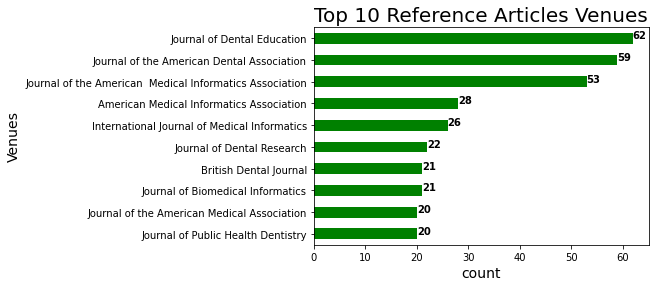

In [39]:
#Plotting a graph for top 10 authors with the maximum number of articles published.
import pandas as pd
import matplotlib.pyplot as plt
plotgraph= pd.read_csv("Articals_withfullnames.csv",encoding = "ISO-8859-1")
plotgraph.set_index("Reference_paper_venue",drop=True,inplace=True)
ax=plotgraph.plot.barh(color = 'green')
ax.invert_yaxis()
venue=plotgraph['count']
plt.title("Top 10 Reference Articles Venues",fontsize=20)
plt.xlabel("count",fontsize=14)
plt.ylabel("Venues",fontsize=14)
ax.legend().set_visible(False)
for i, v in enumerate(venue):
    ax.text(v, i, str(v),
            color = 'black', fontweight = 'bold')
plt.savefig('ref_Analysis_graph.png',bbox_inches='tight',dpi=400)
plt.show()
# plotgraph= df.nlargest(10, ['count'])[["Reference_paper_venue","count"]]
# plotgraph